# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Create url and unit for API call
url = ' http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
# query url
qurl = f'{url}&appid={weather_api_key}&units={units}&q='
# Preview the dataset to see dictionaries
data = requests.get(qurl + city).json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': 9.4942, 'lon': 50.8122},
 'dt': 1632202049,
 'id': 64814,
 'main': {'feels_like': 84.99,
          'grnd_level': 1010,
          'humidity': 65,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 81.75,
          'temp_max': 81.75,
          'temp_min': 81.75},
 'name': 'Bandarbeyla',
 'sys': {'country': 'SO', 'sunrise': 1632191164, 'sunset': 1632234823},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 215, 'gust': 31.45, 'speed': 24.74}}


In [5]:
# Create empty lists for data storing
city_list = []
country = []
lat = []
lng = []
date = []
clouds = []
temp_max = []
humidity = []
wind_speed = []
# Set record counters
i = 1

In [6]:
# Perform API calls to check weather on each city
# Loop through data set using Try and Except
print("Beginning Data Retrieval")
print("-----------------------------")

for x in cities: 
    try:
        data = requests.get(qurl + x).json()
        city_list.append(data['name'])
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])  
        lng.append(data['coord']['lon'])
        date.append(data['dt'])
        clouds.append(data['clouds']['all'])
        temp_max.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind_speed.append(data['wind']['speed'])
        print(f'Processing Record {i} of Set {i} | {x}')
        i += 1
    except (KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 2 | dikson
Processing Record 3 of Set 3 | ushuaia
Processing Record 4 of Set 4 | kumluca
Processing Record 5 of Set 5 | letterkenny
City not found. Skipping...
Processing Record 6 of Set 6 | hilo
Processing Record 7 of Set 7 | kapaa
Processing Record 8 of Set 8 | darya khan
City not found. Skipping...
Processing Record 9 of Set 9 | port elizabeth
Processing Record 10 of Set 10 | rikitea
Processing Record 11 of Set 11 | port alfred
Processing Record 12 of Set 12 | mataura
City not found. Skipping...
Processing Record 13 of Set 13 | severo-kurilsk
Processing Record 14 of Set 14 | mar del plata
Processing Record 15 of Set 15 | nogliki
Processing Record 16 of Set 16 | isangel
Processing Record 17 of Set 17 | castro-urdiales
Processing Record 18 of Set 18 | busselton
Processing Record 19 of Set 19 | mahebourg
City not found. Skipping...
Proces

Processing Record 178 of Set 178 | laguna
Processing Record 179 of Set 179 | matay
Processing Record 180 of Set 180 | maymyo
Processing Record 181 of Set 181 | venado tuerto
Processing Record 182 of Set 182 | ibotirama
Processing Record 183 of Set 183 | luderitz
Processing Record 184 of Set 184 | along
Processing Record 185 of Set 185 | tiksi
Processing Record 186 of Set 186 | tasiilaq
Processing Record 187 of Set 187 | ningbo
Processing Record 188 of Set 188 | unai
Processing Record 189 of Set 189 | riyadh
Processing Record 190 of Set 190 | bushehr
Processing Record 191 of Set 191 | pasighat
Processing Record 192 of Set 192 | ploemeur
Processing Record 193 of Set 193 | lorengau
Processing Record 194 of Set 194 | airai
City not found. Skipping...
Processing Record 195 of Set 195 | torbay
Processing Record 196 of Set 196 | kyshtovka
Processing Record 197 of Set 197 | matagami
City not found. Skipping...
Processing Record 198 of Set 198 | iqaluit
City not found. Skipping...
Processing Re

Processing Record 353 of Set 353 | te anau
City not found. Skipping...
Processing Record 354 of Set 354 | road town
Processing Record 355 of Set 355 | hamilton
Processing Record 356 of Set 356 | port hawkesbury
Processing Record 357 of Set 357 | warora
Processing Record 358 of Set 358 | dawei
Processing Record 359 of Set 359 | susangerd
Processing Record 360 of Set 360 | lunenburg
Processing Record 361 of Set 361 | anito
Processing Record 362 of Set 362 | hermosillo
City not found. Skipping...
Processing Record 363 of Set 363 | olinda
Processing Record 364 of Set 364 | remanso
Processing Record 365 of Set 365 | predivinsk
Processing Record 366 of Set 366 | syracuse
Processing Record 367 of Set 367 | charlestown
Processing Record 368 of Set 368 | krasnoselkup
Processing Record 369 of Set 369 | talakan
Processing Record 370 of Set 370 | sungaipenuh
Processing Record 371 of Set 371 | brae
Processing Record 372 of Set 372 | jabinyanah
Processing Record 373 of Set 373 | tres arroyos
Process

Processing Record 530 of Set 530 | awjilah
Processing Record 531 of Set 531 | malakal
Processing Record 532 of Set 532 | kita
Processing Record 533 of Set 533 | arecibo
Processing Record 534 of Set 534 | beyla
Processing Record 535 of Set 535 | bubaque
Processing Record 536 of Set 536 | plainview
Processing Record 537 of Set 537 | aioi
Processing Record 538 of Set 538 | la peca
Processing Record 539 of Set 539 | harper
Processing Record 540 of Set 540 | kristiinankaupunki
Processing Record 541 of Set 541 | souillac
Processing Record 542 of Set 542 | samarai
Processing Record 543 of Set 543 | vanimo
Processing Record 544 of Set 544 | ruteng
Processing Record 545 of Set 545 | klaksvik
Processing Record 546 of Set 546 | moree
Processing Record 547 of Set 547 | simao
Processing Record 548 of Set 548 | arman
Processing Record 549 of Set 549 | veinticinco de mayo
Processing Record 550 of Set 550 | dong hoi
Processing Record 551 of Set 551 | lorca
Processing Record 552 of Set 552 | yining
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dataframe from lists
df = pd.DataFrame({'City' : city_list, 
                    'Country' : country,
                    'Lat' : lat,
                    'Lng' : lng,
                    'Date' : date,
                    'Cloudiness' : clouds,
                    'Max. Temp.' : temp_max,
                    'Humidity' : humidity,
                    'Wind Speed' : wind_speed})
# Export the city data into a .csv
df.to_csv('../output_data/CityWeather.csv')
# Display the DataFrame
df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
0,Thompson,CA,55.7435,-97.8558,1632201993,40,33.96,100,0.00
1,Dikson,RU,73.5069,80.5464,1632202050,75,34.86,77,9.53
2,Ushuaia,AR,-54.8000,-68.3000,1632201883,75,47.86,71,4.61
3,Kumluca,TR,36.3703,30.2869,1632202051,0,81.59,35,3.85
4,Letterkenny,IE,54.9500,-7.7333,1632202052,100,51.17,98,4.41


In [8]:
# Perform statistical summary using describe method
df.describe()

,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
count,565.000000,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000
mean,18.515455,20.083324,1.632202e+09,50.971681,65.814726,68.247788,8.482372
std,33.209279,90.284499,1.218014e+02,38.610795,16.771238,22.221935,5.772861
min,-54.800000,-179.166700,1.632202e+09,0.000000,11.970000,10.000000,0.000000
25%,-9.875600,-57.766700,1.632202e+09,10.000000,53.110000,56.000000,4.320000
50%,21.461200,23.686600,1.632202e+09,52.000000,69.670000,74.000000,7.340000
75%,45.616900,100.354300,1.632202e+09,90.000000,79.000000,85.000000,11.920000
max,78.218600,179.316700,1.632202e+09,100.000000,99.000000,100.000000,31.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check max. humidity 
df['Humidity'].max()

100

In [10]:
# There are no citis that have humidity more than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

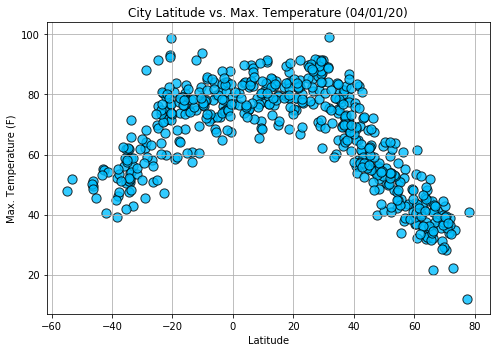

In [11]:
# Create scatter plot between latitude and max. temperature
fig1 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Max. Temp.',
                    title = 'City Latitude vs. Max. Temperature (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    grid = True,
                   ylim = (min(df['Max. Temp.']) - 5, max(df['Max. Temp.'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/Lat_TempMax.png')

## Latitude vs. Humidity Plot

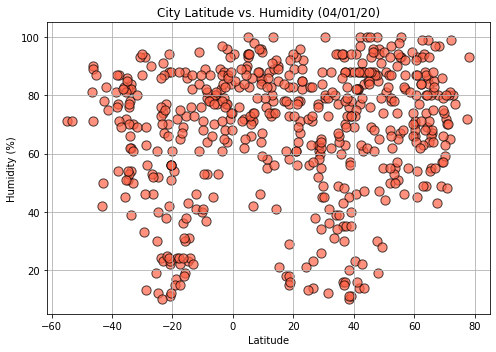

In [12]:
# Create scatter plot between latitude and humidity
fig2 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Humidity',
                    title = 'City Latitude vs. Humidity (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Humidity']) - 5, max(df['Humidity'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Humidity.png')

## Latitude vs. Cloudiness Plot

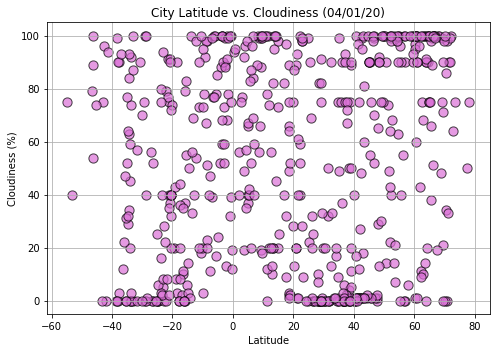

In [13]:
# Create scatter plot between latitude and cloudiness
fig3 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Cloudiness',
                    title = 'City Latitude vs. Cloudiness (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Cloudiness']) - 5, max(df['Cloudiness'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Cloudiness.png')

## Latitude vs. Wind Speed Plot

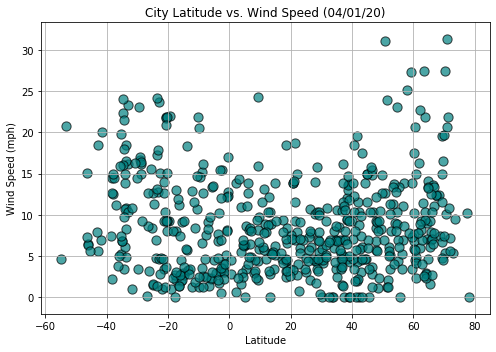

In [14]:
# Create scatter plot between latitude and wind speed
fig4 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Wind Speed',
                    title = 'City Latitude vs. Wind Speed (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Wind Speed']) - 2, max(df['Wind Speed'] + 2)))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/Lat_WindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Determine Northern Hemisphere and Southern Hemisphere
lat_north = df[df['Lat'] >= 0]
lat_south = df[df['Lat'] <= 0]

The r-value is: -0.8621451351252768


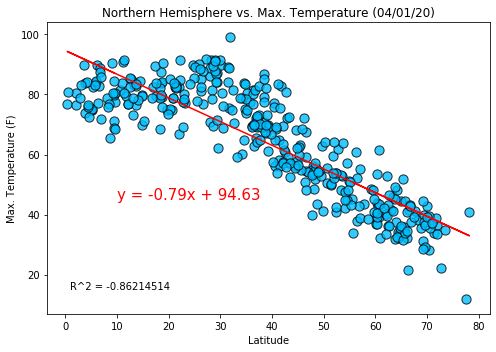

In [16]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Max. Temp.'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Northern Hemisphere vs. Max. Temperature (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Max. Temp.']) - 5, max(lat_north['Max. Temp.'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (10, 45), fontsize = 15, color = "red")
plt.text(1, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_TempMax_Reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.733733346404142


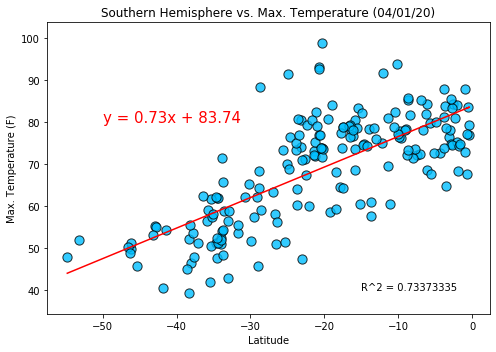

In [17]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Max. Temp.'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Southern Hemisphere vs. Max. Temperature (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Max. Temp.']) - 5, max(lat_south['Max. Temp.'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 80), fontsize = 15, color = "red")
plt.text(-15, 40, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_TempMax_Reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01791206428282032


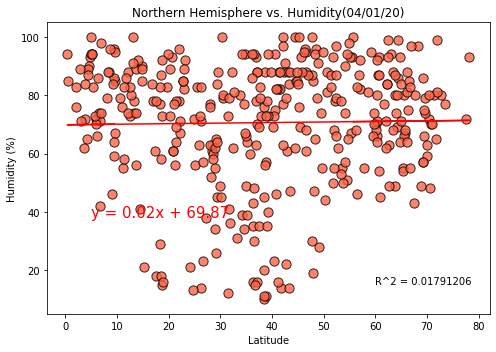

In [18]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Humidity'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Northern Hemisphere vs. Humidity(04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Humidity']) - 5, max(lat_north['Humidity'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (5, 38), fontsize = 15, color = "red")
plt.text(60, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Humid_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.035125996904351114


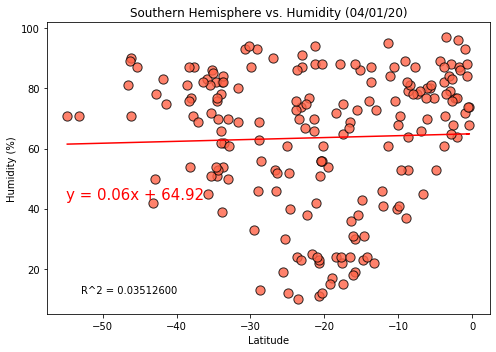

In [19]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Humidity'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Southern Hemisphere vs. Humidity (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Humidity']) - 5, max(lat_south['Humidity'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-55, 43), fontsize = 15, color = "red")
plt.text(-53, 12, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Humid_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15516647321022914


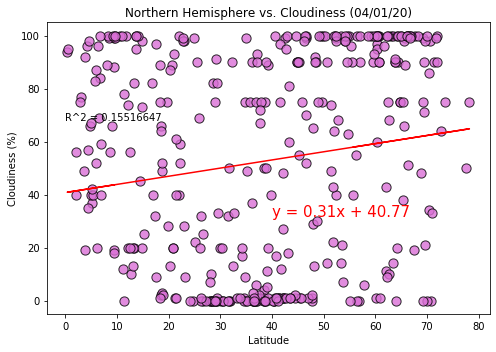

In [20]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Cloudiness'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Northern Hemisphere vs. Cloudiness (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Cloudiness']) - 5, max(lat_north['Cloudiness'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (40, 32), fontsize = 15, color = "red")
plt.text(0, 68, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Cloud_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.168258878624708


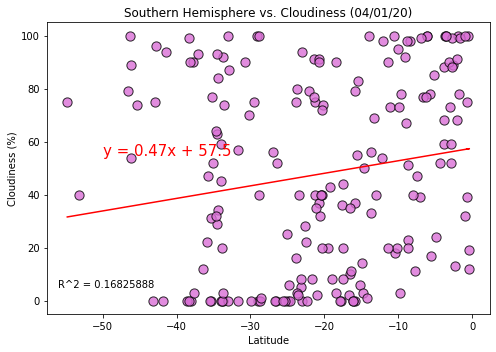

In [21]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Cloudiness'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Southern Hemisphere vs. Cloudiness (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Cloudiness']) - 5, max(lat_south['Cloudiness'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 55), fontsize = 15, color = "red")
plt.text(-56, 5, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Cloud_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24221960977287008


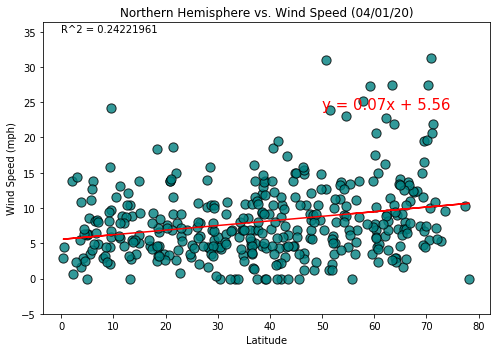

In [22]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Wind Speed'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Northern Hemisphere vs. Wind Speed (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Wind Speed'] - 5), max(lat_north['Wind Speed'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (50, 24), fontsize = 15, color = "red")
plt.text(0, 35, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Wind_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2729830991716292


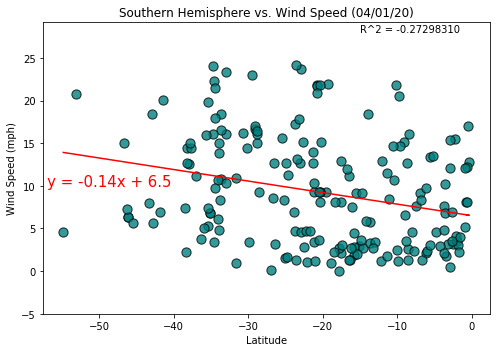

In [23]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Wind Speed'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Southern Hemisphere vs. Wind Speed (04/01/20)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Wind Speed'] - 5), max(lat_south['Wind Speed'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-57, 10), fontsize = 15, color = "red")
plt.text(-15, 28, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Wind_Reg.png')